In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
#data_path = ("https://raw.githubusercontent.com/ecboyes/Thinkful-Data-Science/"
#             "master/yelp_labelled.txt"
#            )

data_path = ("https://raw.githubusercontent.com/ecboyes/Thinkful-Data-Science/"
             "master/amazon_cells_labelled.txt"
            )
review_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
review_raw.columns = ['review', '1']
print(review_raw.dtypes)

review    object
1          int64
dtype: object


In [3]:
keywords = ['love', 'amazing', 'delicious', 'good', 'great', 'perfect', 'excellent', 'loved', 'tasty', 'beautiful', 'best', 
            'yum', 'worst', 'terrible', 'never', 'slow', 'rude', 'overpriced', 'fantastic']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    review_raw[str(key)] = review_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
#sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [5]:
review_raw['bool'] = (review_raw['1'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.
print(review_raw['bool'])

0      False
1       True
2       True
3      False
4       True
5      False
6      False
7       True
8      False
9      False
10      True
11      True
12     False
13      True
14     False
15      True
16     False
17      True
18      True
19     False
20     False
21      True
22     False
23      True
24     False
25      True
26      True
27     False
28     False
29     False
       ...  
970    False
971     True
972    False
973    False
974    False
975     True
976     True
977     True
978     True
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: bool, Length: 1000, dtype: bool


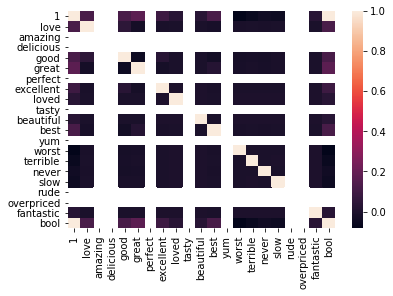

In [6]:
sns.heatmap(review_raw.corr())

In [7]:
data = review_raw[keywords]
target = review_raw['1']

In [8]:
## Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 405
